In [21]:
import datetime as dt
print(dt.datetime.now())

2020-05-14 23:02:07.197718


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [23]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                  "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                  "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                  "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                  "ies/time_series_covid19_recovered_global.csv")


In [24]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,750,751,751,752,752,754,755,755,758,760
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,36,36,36,43,43,45,45,45,45


In [25]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,397,421,458,468,472,502,558,558,610,648
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,543,570,595,605,620,627,650,654,682,688
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,499,514,521,526,537,545,550,550,568,576
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,13,13,13,13,14


In [26]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [27]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [28]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,98647,99970,101650,103135,104691,106220,107603,109286,110767,112725
Turkey,0,0,0,0,0,0,0,0,0,0,...,127659,129491,131744,133721,135569,137115,138657,139771,141475,143114
Germany,0,0,0,0,0,1,4,4,4,5,...,166152,167007,168162,169430,170588,171324,171879,172576,173171,174098
France,0,0,2,3,3,3,4,5,5,5,...,169583,170687,174224,174918,176202,176782,177094,177547,178349,178184
Brazil,0,0,0,0,0,0,0,0,0,0,...,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137
Italy,0,0,0,0,0,0,0,0,0,2,...,211938,213013,214457,215858,217185,218268,219070,219814,221216,222104
Spain,0,0,0,0,0,0,0,0,0,0,...,218011,219329,220325,221447,222857,223578,224350,227436,228030,228691
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,191832,196243,202359,207977,212629,216525,220449,224332,227741,230985
Russia,0,0,0,0,0,0,0,0,0,2,...,145268,155370,165929,177160,187859,198676,209688,221344,232243,242271


[Text(0, 0.5, 'Cases'), Text(0.5, 0, 'Dates')]

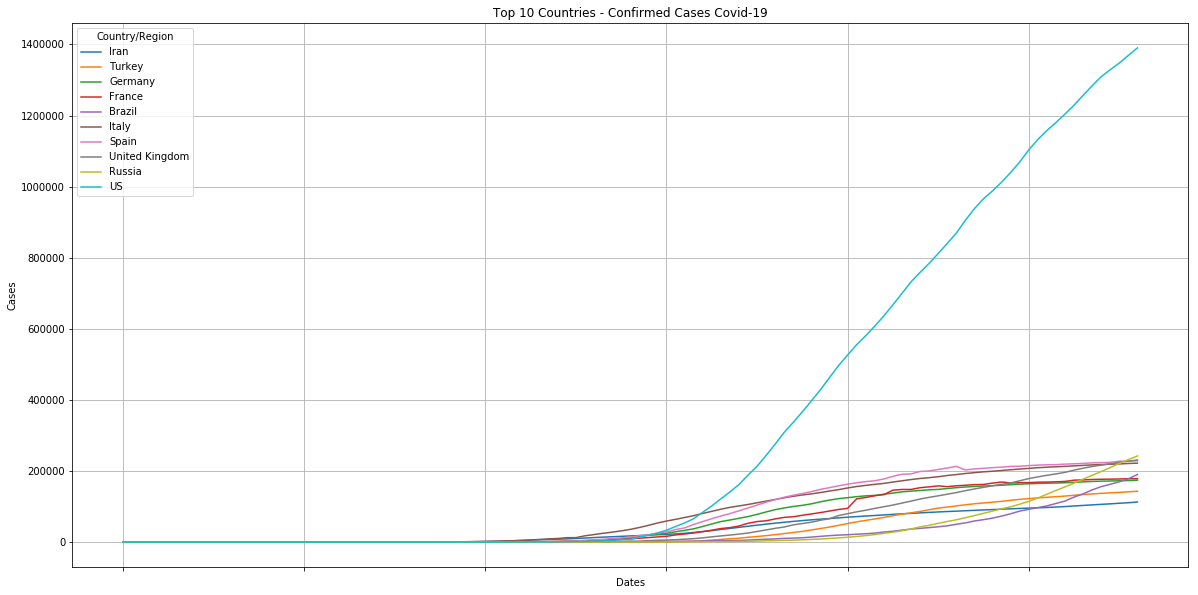

In [36]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(1,1,1)

df_top10.T.plot(ax=ax, legend=True)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize = 12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases")